ready to use columns: 'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage'

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_values = pd.read_csv('../data/raw/train_values.csv')

In [7]:
train_values.shape

(260601, 39)

In [5]:
df = train_values.loc[:, ['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position']]

In [6]:
df.shape

(260601, 14)

In [20]:
df.isna().sum()

building_id               0
geo_level_1_id            0
geo_level_2_id            0
geo_level_3_id            0
count_floors_pre_eq       0
age                       0
area_percentage           0
height_percentage         0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   building_id             260601 non-null  int64 
 1   geo_level_1_id          260601 non-null  int64 
 2   geo_level_2_id          260601 non-null  int64 
 3   geo_level_3_id          260601 non-null  int64 
 4   count_floors_pre_eq     260601 non-null  int64 
 5   age                     260601 non-null  int64 
 6   area_percentage         260601 non-null  int64 
 7   height_percentage       260601 non-null  int64 
 8   land_surface_condition  260601 non-null  object
 9   foundation_type         260601 non-null  object
 10  roof_type               260601 non-null  object
 11  ground_floor_type       260601 non-null  object
 12  other_floor_type        260601 non-null  object
 13  position                260601 non-null  object
dtypes: int64(8), object(6)
memory usage:

In [9]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000


In [29]:
df_obj = df.select_dtypes(include='object')

In [33]:
for i in df_obj.columns:
    print(df.loc[:, i].unique())

['t' 'o' 'n']
['r' 'w' 'i' 'u' 'h']
['n' 'q' 'x']
['f' 'x' 'v' 'z' 'm']
['q' 'x' 'j' 's']
['t' 's' 'j' 'o']


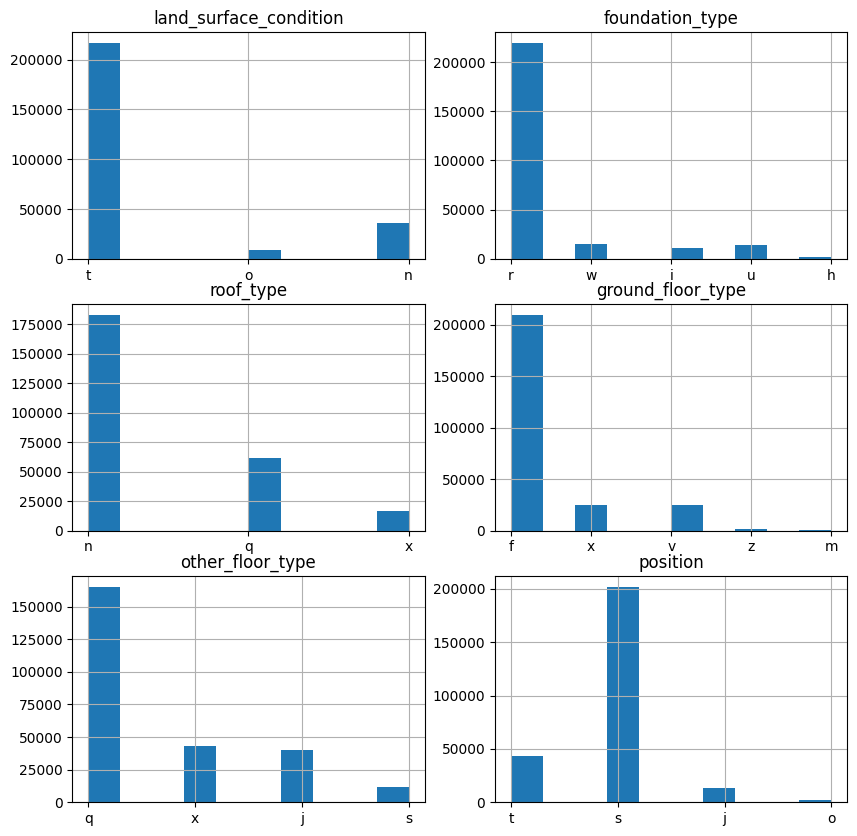

In [41]:
f, axarr = plt.subplots(3, 2, figsize = (10,10))
for i, col in enumerate(df_obj):
    ax = axarr.flat[i]
    df[col].hist(ax=ax)
    ax.set_title(col)

In [43]:
df_int = df.select_dtypes(include='int64')
df_int.shape

(260601, 8)

In [51]:
df_int = df_int.drop(columns=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

In [53]:
df_wo_age = df_int.loc[~(df_int.loc[:, 'age'] == 995),:]

(array([1, 2, 3, 4]),
 [Text(1, 0, 'count_floors_pre_eq'),
  Text(2, 0, 'age'),
  Text(3, 0, 'area_percentage'),
  Text(4, 0, 'height_percentage')])

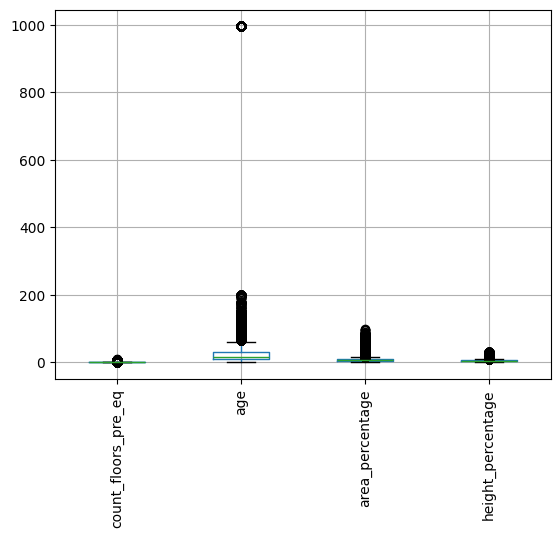

In [54]:
df_int.boxplot()
plt.xticks(rotation=90)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'count_floors_pre_eq'),
  Text(2, 0, 'age'),
  Text(3, 0, 'area_percentage'),
  Text(4, 0, 'height_percentage')])

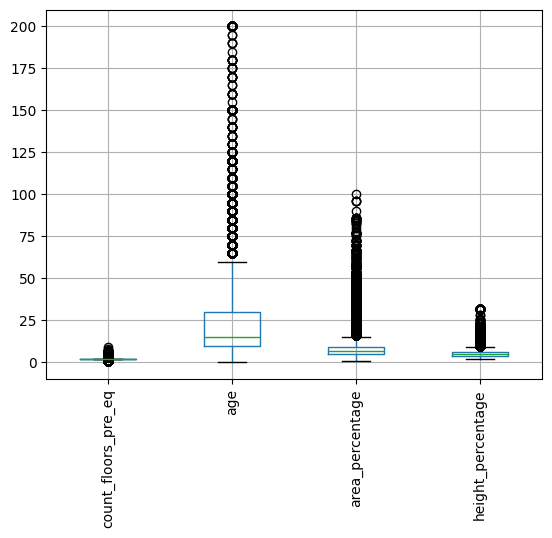

In [56]:
df_wo_age.boxplot()
plt.xticks(rotation=90)